In [4]:
from unicodedata import east_asian_width
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Creación de df con todos los datos de Norte 2: Universidad

In [5]:
estaciones = pd.ExcelFile("DatosIniciales\Estaciones.xlsx")
dfNorte2 =pd.read_excel(estaciones, 'PM10')[['date', 'Norte2']]

for i in estaciones.sheet_names:
    union = pd.read_excel(estaciones, str(i))
    union.rename(columns={'Norte2':'Norte2_'+str(i)}, inplace=True)
    dfNorte2 = pd.merge(dfNorte2, union[['date', 'Norte2_'+str(i)]], on = 'date')

del dfNorte2['Norte2']

dfNorte2.columns = ['date','PM10', 'PM2.5','O3','NO','NO2','NOx','SO2','CO','PRS','RH','TOUT','SR','WSR','WDR','RQINF']

dfNorte2.head()

,date,PM10,PM2.5,O3,NO,NO2,NOx,SO2,CO,PRS,RH,TOUT,SR,WSR,WDR,RQINF
0,2018-01-01 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 01:00:00.000,20.0,NaN,11.0,9.7,2.9,12.0,NaN,NaN,723.0,89.0,7.94,0.0,15.5,44.0,0.0
2,2018-01-01 02:00:00.000,29.0,25.0,10.0,11.6,5.1,16.7,NaN,NaN,723.2,88.0,7.39,0.0,15.3,43.0,0.0
3,2018-01-01 03:00:00.000,26.0,18.0,8.0,9.5,4.3,13.6,NaN,NaN,723.4,90.0,6.37,0.0,13.0,48.0,0.0
4,2018-01-01 04:00:00.000,NaN,11.0,8.0,10.7,4.5,15.0,NaN,NaN,723.8,94.0,5.42,0.0,13.3,48.0,0.0


### Llenando los NAs linearmente con los datos que se tienen

In [6]:
df=dfNorte2.copy()
df.interpolate(method='linear',inplace=True)
df.fillna(method='bfill',inplace=True)
df.head()

,date,PM10,PM2.5,O3,NO,NO2,NOx,SO2,CO,PRS,RH,TOUT,SR,WSR,WDR,RQINF
0,2018-01-01 00:00:00.000,20.0,25.0,11.0,9.7,2.9,12.0,5.6,0.92,723.0,89.0,7.94,0.0,15.5,44.0,0.0
1,2018-01-01 01:00:00.000,20.0,25.0,11.0,9.7,2.9,12.0,5.6,0.92,723.0,89.0,7.94,0.0,15.5,44.0,0.0
2,2018-01-01 02:00:00.000,29.0,25.0,10.0,11.6,5.1,16.7,5.6,0.92,723.2,88.0,7.39,0.0,15.3,43.0,0.0
3,2018-01-01 03:00:00.000,26.0,18.0,8.0,9.5,4.3,13.6,5.6,0.92,723.4,90.0,6.37,0.0,13.0,48.0,0.0
4,2018-01-01 04:00:00.000,15.5,11.0,8.0,10.7,4.5,15.0,5.6,0.92,723.8,94.0,5.42,0.0,13.3,48.0,0.0


### Graficando las variables

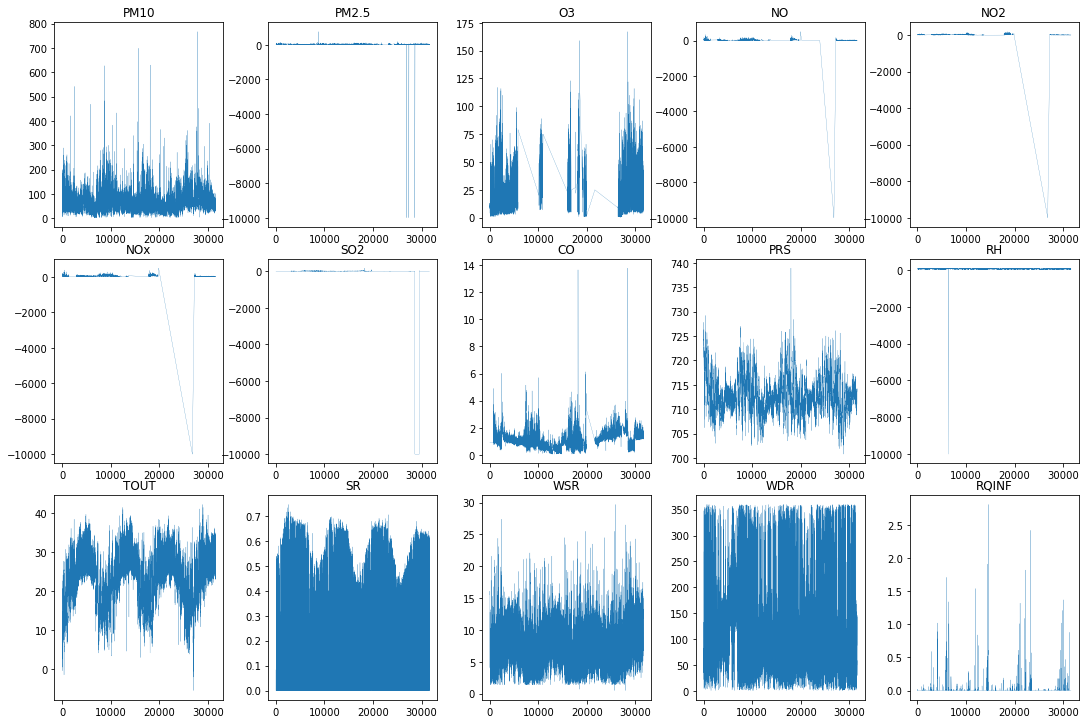

In [7]:
fig, ax = plt.subplots(3, 5, figsize=(15,10))
fig.tight_layout()

x = range(len(df))
inde=1
for i in range(3):
    for j in range(5):
        ax[i,j].set_title(df.columns[inde])
        ax[i,j].plot(x, df[df.columns[inde]], linewidth = 0.2)
        inde += 1

### Quitando los outliers utilizando el metodo de percentiles y rellenando estos linearmente

In [8]:
for i in df.columns[1:15]:
    Q1=np.percentile(df[i], 25)
    Q3=np.percentile(df[i], 75)
    IQR=Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR 
    df[i].where((df[i] > lower) & (df[i] < upper), np.nan, inplace = True)

In [9]:
df.interpolate(method='linear',inplace=True)
df.fillna(method='bfill',inplace=True)

### Graficando todo finalmente

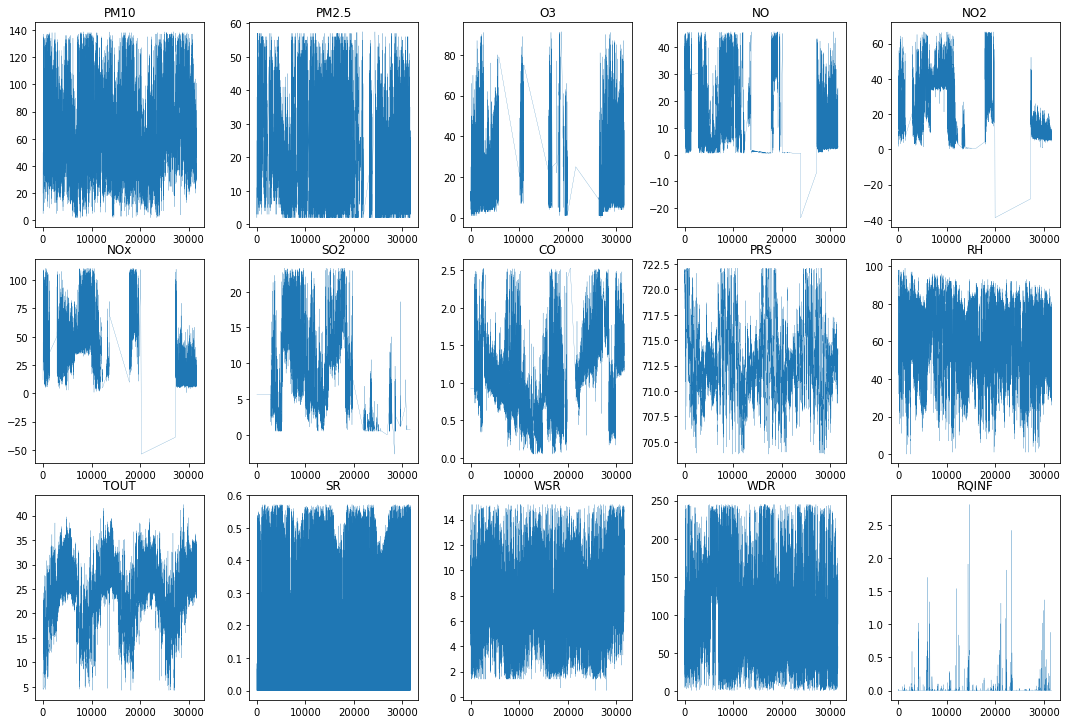

In [10]:
fig, ax = plt.subplots(3, 5, figsize=(15,10))
fig.tight_layout()

x = range(len(df))
inde=1
for i in range(3):
    for j in range(5):
        ax[i,j].set_title(df.columns[inde])
        ax[i,j].plot(x, df[df.columns[inde]], linewidth=0.2)
        inde += 1

In [ ]:
df.to_csv('CleanDF.csv')